In [79]:
import rebound 

import sympy as sp
from matplotlib import pyplot as plt
from matplotlib import pyplot

import numpy as np

from sympy import init_printing
init_printing()

%matplotlib inline
from sympy import *

import math

In [80]:
# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# Predicting an Astrometric signal

## Variables set 

In [81]:
timescale = 4.2

planet_inc = 2

m_star  = 1                                                # M_sun
z_star  = 50*206265                                        # AU
v_star  = 4.74*(50*0.001)*(50)* (1/1.496e+8) * (3.154e+7)  # AU/year
vz_star = 0.1*v_star                                       # AU/year

## Simulations

In [82]:
sim_wp = rebound.Simulation()                                                               # create a simulation named sim_wp 

sim_wp.units=["msun","AU","year"]                                                           # setting units of sim_wpm

sim_wp.add(m=1)                                                                             # add the Sun as the central object 

sim_wp.add(m=3.0027e-6, a=1, e=0)                                                           # add Earth in a 1 AU circular orbit 

sim_wp.add(x = 1.031e7, vy=v_star, m = m_star, z = z_star, vz=vz_star)                      # add a star 50 pc away with calculated velocity and set parameters

sim_wp.add(m = 0.0143188, a = 0.6, e = 0.2, primary = sim_wp.particles[2], inc=planet_inc)  # add planet from figure 3.1 caption and have it orbit the star 

In [83]:
com_particle = sim_wp.calculate_com(first=2,last=4)

In [102]:
sim = rebound.Simulation()                          # create a simulation named sim 

sim.units=["msun","AU","year"]                      # setting units of sim 

sim.add(m=1)                                        # add the Sun as the central object 

sim.add(m=3.0027e-6, a=1, e=0)                      # add Earth in a 1 AU circular orbit 

sim.add(com_particle)                               # add a particle equivaent to the star-planet barycentre

## Arrays to hold data 

In [85]:
m = 200
times = np.linspace(0,timescale,num=m)

In [86]:
# positions of sun, earth, star and planet
pos_sun   , pos_sun_wp    = np.zeros((m,3)) , np.zeros((m,3))
pos_earth , pos_earth_wp  = np.zeros((m,3)) , np.zeros((m,3))
pos_star  , pos_star_wp   = np.zeros((m,3)) , np.zeros((m,3))
pos_planet_wp             = np.zeros((m,3))

# center of mass 
sun_earth_com , sun_earth_com_wp = np.zeros((m,3)) , np.zeros((m,3))
all_com       , all_com_wp       = np.zeros((m,3)) , np.zeros((m,3))

# r_star - r_earth vector
r_SE, r_SE_wp  = np.zeros((m,3)), np.zeros((m,3))

# length of r_star - r_earth vector in x-y plane
r_SE_xy, r_SE_xy_wp = np.zeros((m,1)), np.zeros((m,1))

# right ascension and declination
alpha , alpha_wp  = np.empty((m,1)) , np.empty((m,1))
delta , delta_wp  = np.empty((m,1)) , np.empty((m,1))

## Filling arrays with data using a for loop

In [87]:
for i,t in enumerate(times):
    sim.integrate(t)
    sim_wp.integrate(t)
    
    # positions of sun, earth and star
    pos_sun[i]   , pos_sun_wp[i]     = sim.particles[0].xyz,   sim_wp.particles[0].xyz
    pos_earth[i] , pos_earth_wp[i]   = sim.particles[1].xyz,   sim_wp.particles[1].xyz
    pos_star[i]  , pos_star_wp[i]    = sim.particles[2].xyz,   sim_wp.particles[2].xyz
    pos_planet_wp[i]                 =                         sim_wp.particles[3].xyz
    
    # center of mass of sun and earth 
    com, com_wp = sim.calculate_com(last=2), sim_wp.calculate_com(last=2)
    sun_earth_com[i], sun_earth_com_wp[i] = com.xyz, com_wp.xyz
    
    # center of mass of all objects 
    com_all, com_all_wp = sim.calculate_com(), sim_wp.calculate_com()
    all_com[i], all_com_wp[i] = com_all.xyz, com_all_wp.xyz
    
    # r_star - r_earth vector 
    r_SE[i], r_SE_wp[i] = pos_star[i] - pos_earth[i], pos_star_wp[i] - pos_earth_wp[i]
    
    #length of r_star - r_earth vector in x-y plane
    r_SE_xy[i], r_SE_xy_wp[i] = np.sqrt(r_SE[i,0]**2 + r_SE[i,1]**2), np.sqrt(r_SE_wp[i,0]**2 + r_SE_wp[i,1]**2)
    
    # calculating RA and Dec in mas
    alpha[i] , alpha_wp[i] = np.arctan((r_SE[i,1]/r_SE[i,0])) *206264806.24709466  , np.arctan((r_SE_wp[i,1]/r_SE_wp[i,0]))*206264806.24709466
    delta[i] , delta_wp[i] = np.arctan((r_SE[i,2]/r_SE_xy[i]))*206264806.24709466 , np.arctan((r_SE_wp[i,2]/r_SE_xy_wp[i]))*206264806.24709466

## Sun Earth position plots 

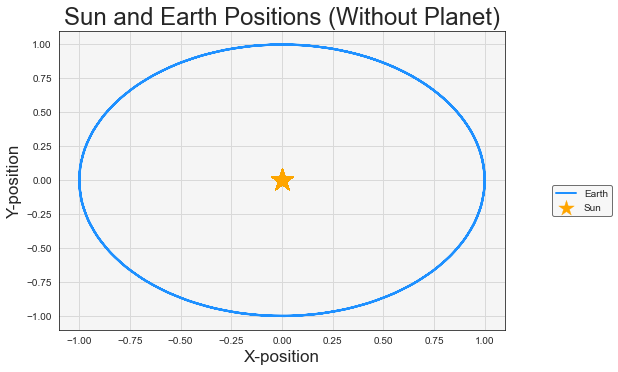

In [88]:
# plotting data 
plt.scatter(pos_sun[:,0], pos_sun[:,1], color='orange', label='Sun', s=550,marker='*') 
plt.plot(pos_earth[:,0], pos_earth[:,1],color='dodgerblue',linewidth=2, markersize=12, label='Earth')

# setting titles
plt.title('Sun and Earth Positions (Without Planet)',fontsize = 24)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plotting legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=0.7, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

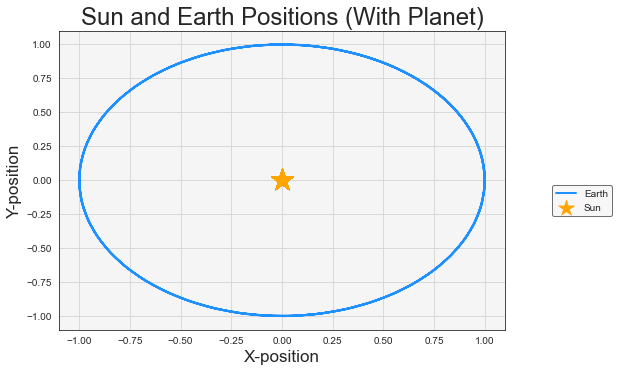

In [89]:
# plotting data
plt.scatter(pos_sun_wp[:,0], pos_sun_wp[:,1], color='orange', label='Sun', s=550,marker='*') 
plt.plot(pos_earth_wp[:,0], pos_earth_wp[:,1],color='dodgerblue',linewidth=2, markersize=12, label='Earth')

# creating titles 
plt.title('Sun and Earth Positions (With Planet)',fontsize = 24)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# creating legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=0.75, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

## Star planet position plots 

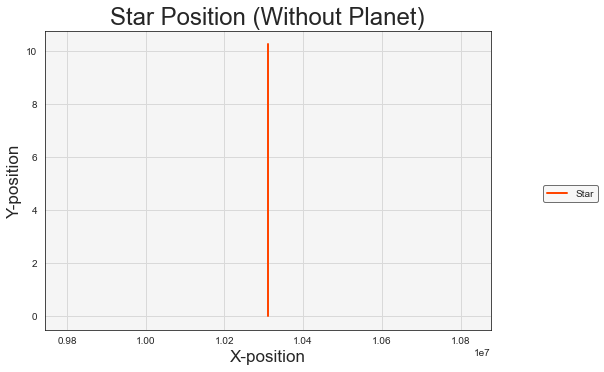

In [104]:
# plotting data 
plt.plot(pos_star[:,0], pos_star[:,1], color='orangered',linewidth=2, markersize=12, label='Star')

# setting titles
plt.title('Star Position (Without Planet)',fontsize = 24)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plotting legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=1, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

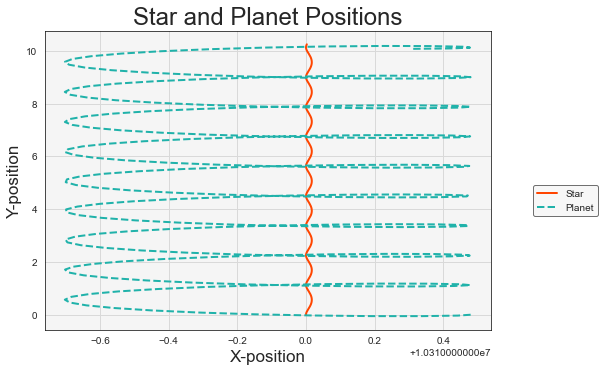

In [91]:
# plotting data 
plt.plot(pos_star_wp[:,0], pos_star_wp[:,1], color='orangered',linewidth=2, markersize=12, label='Star')
plt.plot(pos_planet_wp[:,0], pos_planet_wp[:,1], color='lightseagreen',linewidth=2, markersize=12, label='Planet', linestyle='dashed')

# creating titles 
plt.title('Star and Planet Positions',fontsize = 24)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# creating legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=1, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

## Comparing astrometric signals

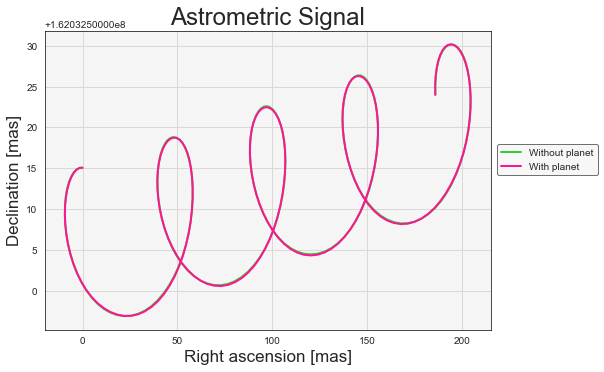

In [101]:
# plotting data 
plt.plot(alpha, delta, color='limegreen',linewidth=2, markersize=12, label='Without planet')
plt.plot(alpha_wp, delta_wp, color='deeppink',linewidth=2, markersize=12, label='With planet')

# set titles 
plt.title('Astrometric Signal',fontsize = 24)             
plt.xlabel('Right ascension [mas]',fontsize = 17)                     
plt.ylabel('Declination [mas]',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

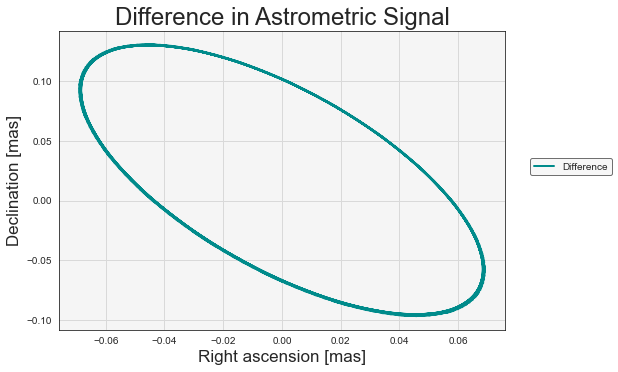

In [100]:
# plotting data 
plt.plot(alpha-alpha_wp, delta-delta_wp, color='darkcyan',linewidth=2, markersize=12, label='Difference')

# set titles 
plt.title('Difference in Astrometric Signal',fontsize = 24)             
plt.xlabel('Right ascension [mas]',fontsize = 17)                     
plt.ylabel('Declination [mas]',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

# Reproducing astrometric signal using equations 3.22 and 3.23

#### Setting the planets 

In [106]:
planets = ['Planet from Figure 3.1']

N = len(planets)
print('The number of planets is:',N)

The number of planets is: 1


# Thiele-Innes Constants

#### Setting constants needed 

## <span style='background :deeppink' > <span style='color:white'> Set conditions properly: $\omega,\Omega$ and $i$</span></span>

In [870]:
a = [1,0.6]                         # semi-major axis in units of AU
omega = [1.99330266505,3]           # argument of perihelion
OMEGA = [-0.1965352438813,3]        # longitude of the ascending node 
i = [0,3]                           # orbital inclination (rad)

In [871]:
A = np.zeros((N,1))
B = np.zeros((N,1))
F = np.zeros((N,1))
G = np.zeros((N,1))
C = np.zeros((N,1))
H = np.zeros((N,1))

In [881]:
k = 0
for k in range(N):
    
    A[k] = a[k]*(np.cos(omega[k])*np.cos(OMEGA[k])-np.sin(omega[k])*np.sin(OMEGA[k])*np.cos(i[k]))
    
    B[k] = a[k]*(np.cos(omega[k])*np.sin(OMEGA[k])+np.sin(omega[k])*np.cos(OMEGA[k])*np.cos(i[k]))
    
    F[k] = a[k]*(-np.sin(omega[k])*np.cos(OMEGA[k])-np.cos(omega[k])*np.sin(OMEGA[k])*np.cos(i[k]))
    
    G[k] = a[k]*(-np.sin(omega[k])*np.sin(OMEGA[k])+np.cos(omega[k])*np.cos(OMEGA[k])*np.cos(i[k]))
    
    C[k] = a[k]*np.sin(omega[k])*np.sin(i[k])
    
    H[k] = a[k]*np.cos(omega[k])*np.sin(i[k])

## Elliptical rectangular coordinates

#### Calculating the period $T$ using the equation: $T \propto a^{3/2}$ (Keplers third law)

In [889]:
T = np.zeros((N,1))

In [890]:
for ii in range(N): 
    T[ii] = a[ii]**(3/2)
    print('The period of',planets[ii],'is',T[ii], 'years')

The period of Earth is [1.] years
The period of Planet from Figure 3.1 is [0.464758] years


#### Calculating the mean motion $n$ using the equation: $n=\frac{2\pi}{T}$ (Solar System Dynamics equation 2.25)

In [891]:
n = np.zeros((N,1))

In [700]:
for jj in range(N):
    n[jj] = (2*np.pi)/T[jj]
    print('The value of n for',planets[ii],'is',n[jj])

The value of n for Planet from Figure 3.1 is [6.28318531]
The value of n for Planet from Figure 3.1 is [13.51926225]


#### Setting the time of pericentre passage 

## <span style='background :deeppink' > <span style='color:white'> Set $\tau$ properly  </span>

 </span>

In [701]:
tau = [0,0]  

#### Calculating mean anomaly $M$ using the equation: $M=n(t-\tau)$ (Solar System Dynamics equation 2.39)

In [702]:
M = np.zeros((m,2))

In [703]:
for jjj,t in enumerate(times):
    M[:,0] = n[0]*(t - tau[0])
    M[:,1] = n[1]*(t - tau[1])

#### Setting the ellipticity of the orbits 

In [704]:
e = [0.0167,0.2]                    

#### Calculating the Eccentric anomaly $E$ using rebound

In [705]:
E = np.zeros((m,2))

In [706]:
v = 0
for v in range(m): 
    E[:,0] = rebound.M_to_E(e[0],M[v,0]) #(e,M)
    E[:,1] = rebound.M_to_E(e[1],M[v,1]) #(e,M)

#### Calculating the elliptical rectangular coordinates using the equations $X=\cos(E(t))-e$ and $Y=\sqrt{(1-e^2)}\sin(E(t))$ (Exoplanet handbook equations 3.21)

In [892]:
X = np.zeros((m,2))
Y = np.zeros((m,2))

In [893]:
g = 0
for g in range(m): 
    X[:,0] = np.cos(E[g,0]) - e[0]
    X[:,1] = np.cos(E[g,1]) - e[1]
    
    Y[:,0] = np.sqrt(1-e[0]**2) * np.sin(E[g,0])
    Y[:,1] = np.sqrt(1-e[1]**2) * np.sin(E[g,1])

## Astrometric displacements due to parallax

#### $r_x,r_y$ and $r_z$ are the cartesian components of the observer position w.r.t the solar system barycentre. The observer is the <span style='background :red' > <span style='color:white'> Earth? (change these positions to wrt to parycenter)  </span> </span>

In [894]:
r = pos_earth_wp

Setting $\alpha$ and $\delta$

## <span style='background :deeppink' > <span style='color:white'> Set values properly: $\alpha, \beta$  </span>

 </span>

In [895]:
alpha1 = 22
delta1 = 23

#### Calculating $\Pi_{\alpha,t}$ and $\Pi_{\delta,t}$ using equation 3.24 from the Exoplanet handbook

In [896]:
PI = np.zeros((m,2))

In [897]:
u = 0
for u in range(m):
    PI[u,0] = r[u,0]*np.sin(alpha1) - r[u,1]*np.cos(alpha1)
    PI[u,1] = (r[u,0]*np.cos(alpha1)+r[u,1]*np.sin(alpha1))*np.sin(delta1) - r[u,2]*np.cos(delta1)

## Final equations 

#### Calculate the sums $\sum_{j=0}^{n_p}[B_jX_{j,t}+G_jY_{j,t}]$ and $\sum_{j=0}^{n_p}[A_jX_{j,t}+F_jY_{j,t}]$

In [898]:
sum_elements = np.zeros((m,2))

In [899]:
o = 0
for o in range(m):
    sum_elements[o,0] = B[0]*X[o,0] + G[0]*Y[o,0] + B[1]*X[o,1] + G[1]*Y[o,1]
    sum_elements[o,1] = A[0]*X[o,0] + F[0]*Y[o,0] + A[1]*X[o,1] + F[1]*Y[o,1]

In [715]:
sum_alpha = np.sum(sum_elements[:,0])

In [716]:
sum_delta = np.sum(sum_elements[:,1])

#### Setting constants 

## <span style='background :deeppink' > <span style='color:white'> Set values properly: $\Delta\alpha_0, \Delta\delta_0, \varpi, \mu_\alpha, \mu_\delta, t_0$  </span>

 </span>

In [717]:
change_RA_0 = 22        # change in RA at time t_0
change_DEC_0 = 45       # change in DEC at time t_0

parallax = 50           # parallax of the system

prop_RA = 12            # proper motion in RA direction
prop_DEC = 14           # proper motion in DEC direction 

t0 = 18                 # fiducial time at the epoch of the observations 

#### Final equations from sum +  "other" $\Delta\alpha_0\cos\delta+\varpi\Pi_{\alpha,t}+\mu_\alpha(t-t_0)$ and $\Delta\delta_0+\varpi\Pi_{\delta,t}+\mu_\delta(t-t_0)$

In [718]:
three22 = np.zeros((m,1))
three23 = np.zeros((m,1))

In [49]:
for d,t in enumerate(times):
    three22[d] = sum_alpha + change_RA_0*np.cos(delta1) + parallax*PI[d,0] + prop_RA*(t - t0)
    three23[d] = sum_delta + change_DEC_0 + parallax*PI[d,1] + prop_DEC*(t - t0)

NameError: name 'sum_alpha' is not defined

## <span style='background :red' > <span style='color:white'> Units?  </span>

 </span>

#### Plot 

NameError: name 'three22' is not defined

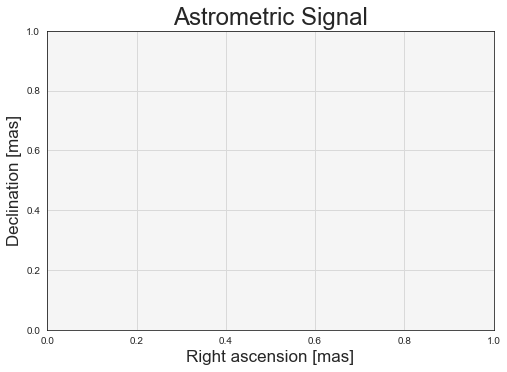

In [48]:
# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# set titles 
plt.title('Astrometric Signal',fontsize = 24)             
plt.xlabel('Right ascension [mas]',fontsize = 17)                     
plt.ylabel('Declination [mas]',fontsize = 17)

# setting x and y limits 
#plt.xlim([-20, 270])
#plt.ylim([-0.30e15,0.30e15])

#################################### plotting data #######################################################
# plot data as scatter
#plt.scatter(three22,three23, color='deeppink', s=55) 

# plotting data as lines 
plt.plot(three22, three23, color='deeppink',linewidth=2, markersize=12)

############################################################################################################ 